<a href="https://colab.research.google.com/github/Harbieq/sales-forecast/blob/main/RecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import importlib
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [ ]:
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing now...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: failed to install the library. Please install it manually.")

In [ ]:
if '/content/ratings_Electronics (1).csv' not in os.listdir():
  check_and_install_library('opendatasets')
  import opendatasets as od
  od.download('https://www.kaggle.com/datasets/irvifa//content/ratings_Electronics (1).csv')

opendatasets is not installed. Installing now...


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting opendatasets

Downloading opendatasets-0.1.22-py3-none-any.whl.metadata (9.2 kB)

Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from opendatasets) (4.66.5)

Requirement already satisfied: kaggle in /usr/local/lib/python3.10/dist-packages (from opendatasets) (1.6.17)

Requirement already satisfied: click in /usr/local/lib/python3.10/dist-packages (from opendatasets) (8.1.7)

Requirement already satisfied: six>=1.10 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (1.16.0)

Requirement already satisfied: certifi>=2023.7.22 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2024.8.30)

Requirement already satisfied: python-dateutil in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.8.2)

Requirement already satisfied: requests in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.32.3)

Requirement already satisfied: python-slugify in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (8.0.4)

Requirement already satisfied: urllib3 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.2.3)

Requirement already satisfied: bleach in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (6.1.0)

Requirement already satisfied: webencodings in /usr/local/lib/python3.10/dist-packages (from bleach->kaggle->opendatasets) (0.5.1)

Requirement already satisfied: text-unidecode>=1.3 in /usr/local/lib/python3.10/dist-packages (from python-slugify->kaggle->opendatasets) (1.3)

Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (3.3.2)

Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (3.10)

Downloading opendatasets-0.1.22-py3-none-any.whl (15 kB)

Installing collected packages: opendatasets

Successfully installed opendatasets-0.1.22

Skipping, found downloaded files in "./" (use force=True to force download)


In [ ]:
# Load the dataframe and set column name
# Load the dataframe and set column name
df = pd.read_csv('/content/ratings_Electronics (1).csv', names=['user_id', 'product_id', 'rating', 'timestamp'])

In [ ]:
df.shape

(633821, 4)

In [ ]:
df.columns

Index(['user_id', 'product_id', 'rating', 'timestamp'], dtype='object')

In [ ]:
electronics_data=df.sample(n=1564896, replace = True, ignore_index=True)

In [ ]:
# after taking samples drop df to release the memory occupied by the entire dataframe
del df

In [ ]:
# print top 5 records of the dataset
electronics_data.head()

,user_id,product_id,rating,timestamp
0,A1O3PFROTQQ3VU,B00054NM4M,4.0,1.132790e+09
1,A2DGUUI336IOPT,B000234I5I,5.0,1.279411e+09
2,A1R0Y671JSZG4V,B00005LE71,3.0,1.396051e+09
3,A2SKP3GDM7662T,B00032AVN6,5.0,1.360022e+09
4,A17W4QCFQORM2F,B000067RWL,1.0,1.404778e+09


In [ ]:
# print the concise information of the datasets
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   user_id     1564896 non-null  object 
 1   product_id  1564896 non-null  object 
 2   rating      1564893 non-null  float64
 3   timestamp   1564893 non-null  float64
dtypes: float64(2), object(2)
memory usage: 47.8+ MB


In [ ]:
# drop timesstamp column
electronics_data.drop('timestamp', axis=1, inplace=True)

In [ ]:
electronics_data.describe()

,rating
count,1.564893e+06
mean,3.974114e+00
std,1.399993e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [ ]:
# handling missing values
electronics_data.isnull().sum()

,0
user_id,0
product_id,0
rating,3


In [ ]:
# handling duplicate records
electronics_data[electronics_data.duplicated()].shape[0]

984668

In [ ]:
electronics_data.head()

,user_id,product_id,rating
0,A1O3PFROTQQ3VU,B00054NM4M,4.0
1,A2DGUUI336IOPT,B000234I5I,5.0
2,A1R0Y671JSZG4V,B00005LE71,3.0
3,A2SKP3GDM7662T,B00032AVN6,5.0
4,A17W4QCFQORM2F,B000067RWL,1.0


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

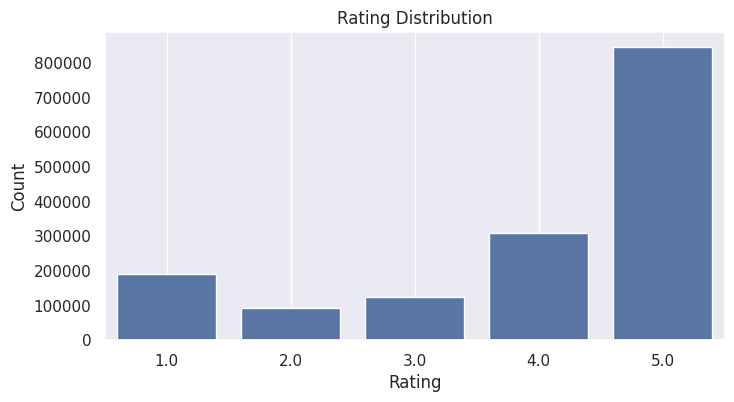

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating', data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

In [ ]:
print('Total rating: ', electronics_data.shape[0])
print('Total unique users : ', electronics_data['user_id'].unique().shape[0])
print('Total unique products : ', electronics_data['product_id'].unique().shape[0])

Total rating:  1564896
Total unique users :  464819
Total unique products :  37437


Analysing the rating by users


In [ ]:
no_of_rated_products_per_user = electronics_data.groupby(by='user_id')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

,rating
user_id,
A5JLAU2ARJ0BO,860
A231WM2Z2JL0U3,557
A25HBO5V8S8SEA,407
AT6CZDCP4TRGA,245
A2B7BUH8834Y6M,237


In [ ]:
print('No of rated product more that 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more that 50 per user : 175 


Popularity based Recommendation

In [ ]:
data=electronics_data.groupby('product_id').filter(lambda x:x['rating'].count()>=50)

In [ ]:
data.head()

,user_id,product_id,rating
0,A1O3PFROTQQ3VU,B00054NM4M,4.0
1,A2DGUUI336IOPT,B000234I5I,5.0
2,A1R0Y671JSZG4V,B00005LE71,3.0
3,A2SKP3GDM7662T,B00032AVN6,5.0
4,A17W4QCFQORM2F,B000067RWL,1.0


In [ ]:
no_of_rated_products_per_user =data.groupby('product_id')['rating'].count().sort_values(ascending=False)

In [ ]:
no_of_rated_products_per_user.head()

,rating
product_id,
B0002L5R78,23581
B0001FTVEK,13112
B00007E7JU,8782
B00007M1TZ,6332
B00004ZCJE,6238


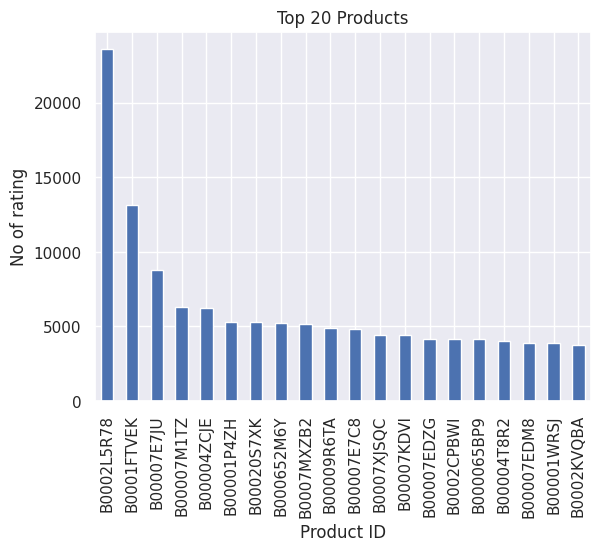

In [ ]:
# top 20 producr
no_of_rated_products_per_user.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('No of rating')
plt.title('Top 20 Products')
plt.show()

In [ ]:
# average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('product_id')['rating'].mean()) # Changed dataFrame to DataFrame

In [ ]:
mean_rating_product_count.head()

,rating
product_id,
1394860919,3.943396
1400501466,3.631415
1400501474,4.484375
1400501520,4.253968
1400501741,3.754098


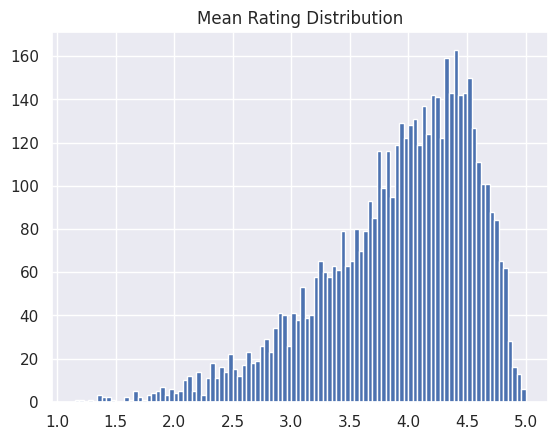

In [ ]:
# Plot the rating distribution of average rating products
plt.hist(mean_rating_product_count['rating'], bins=100)
plt.title('Mean Rating Distribution')
plt.show()

In [ ]:
# check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-0.9345674196380291

In [ ]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('product_id')['rating'].count())

In [ ]:
mean_rating_product_count.head()

,rating,rating_counts
product_id,,
1394860919,3.943396,53
1400501466,3.631415,643
1400501474,4.484375,64
1400501520,4.253968,189
1400501741,3.754098,61


In [ ]:
# Highest mean rating product count
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
product_id,,
B0002L5R78,4.454434,23581


In [ ]:
# Main mean rating product
print('Main mean rating product : ', mean_rating_product_count['rating_counts'].min())
print('total min average rating product : ', mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

Main mean rating product :  50
total min average rating product :  78


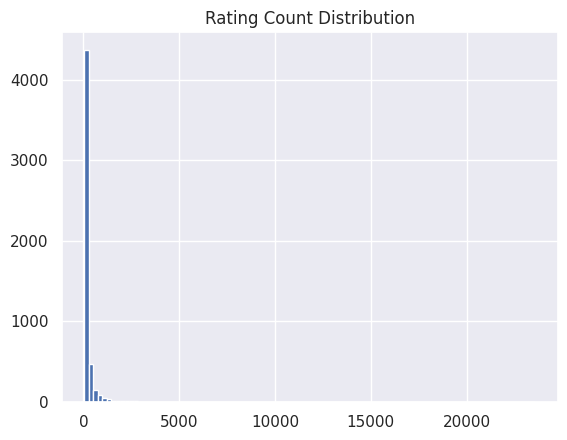

In [ ]:
# Plot the rating count of the mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'], bins=100)
plt.title('Rating Count Distribution')
plt.show()

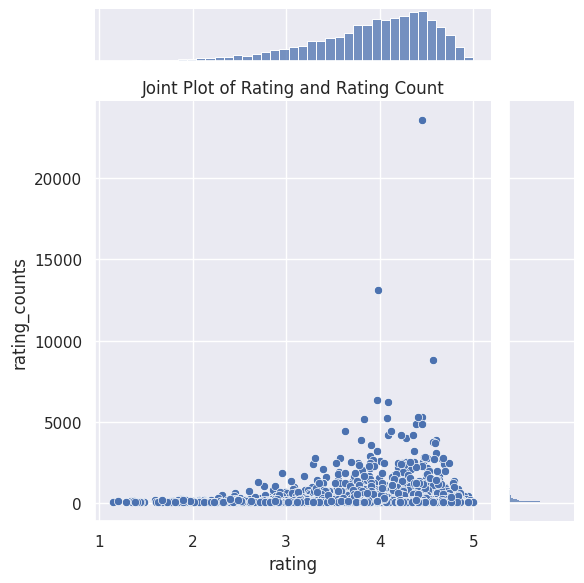

In [ ]:
# Joint plot for rating and rating counts
sns.jointplot(x='rating', y='rating_counts', data=mean_rating_product_count)
plt.title('Joint Plot of Rating and Rating Count')
plt.tight_layout()
plt.show()

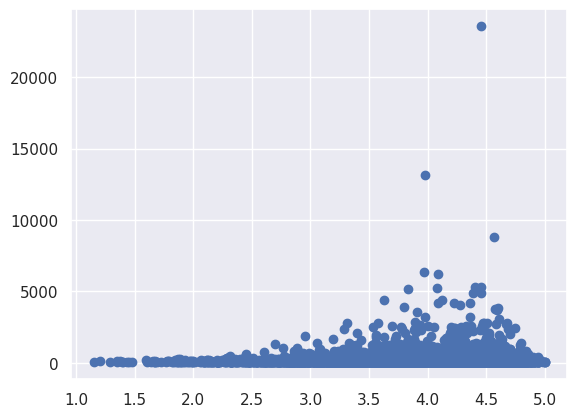

In [ ]:
plt.scatter(x=mean_rating_product_count['rating'], y=mean_rating_product_count['rating_counts'])
plt.show()


Collaborative Filtering (Item to Item Recommendation)

In [ ]:
# Import surptise libraries for collaborative filtering
check_and_install_library('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


surprise is not installed. Installing now...


Collecting surprise

Downloading surprise-0.1-py2.py3-none-any.whl.metadata (327 bytes)

Collecting scikit-surprise (from surprise)

Downloading scikit_surprise-1.1.4.tar.gz (154 kB)

Output()

Installing build dependencies: started

Installing build dependencies: finished with status 'done'

Getting requirements to build wheel: started

Getting requirements to build wheel: finished with status 'done'

Preparing metadata (pyproject.toml): started

Preparing metadata (pyproject.toml): finished with status 'done'

Requirement already satisfied: joblib>=1.2.0 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.4.2)

Requirement already satisfied: numpy>=1.19.5 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.26.4)

Requirement already satisfied: scipy>=1.6.0 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.13.1)

Downloading surprise-0.1-py2.py3-none-any.whl (1.8 kB)

Building wheels for collected packages: scikit-surprise

Building wheel for scikit-surprise (pyproject.toml): started

Building wheel for scikit-surprise (pyproject.toml): finished with status 'done'

Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357278 sha256=1cfcfdd227247e1642664c2b4232308f69d3433e69ec07dbd3507a475d6badbd

Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54

Successfully built scikit-surprise

Installing collected packages: scikit-surprise, surprise

Successfully installed scikit-surprise-1.1.4 surprise-0.1

In [ ]:
# Reading the dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data, reader)

In [ ]:
# Splitting the dataset into 80-20 ratio using the train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3, random_state=42)

In [ ]:
# Use user based true/false to switch between userbased or item based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
# Make predictions using testset
test_pred = algo.test(testset)

In [ ]:
# Print
print('Item-based Model : Test Set')
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 0.5711


0.571084507725634

Model based collaboration filtering system

In [ ]:
import pandas as pd

# Specify the column names manually
column_names = ['user_id', 'product_id', 'rating']

# Load the dataset and assign the column names
data = pd.read_csv('/content/ratings_Electronics (1).csv', names=column_names, header=None)


In [ ]:
data2=data.sample(200000)
ratings_matrix = data2.pivot_table(values='rating', index='user_id', columns='product_id', fill_value=0)
ratings_matrix.head()

product_id,1,2,3,4,5
user_id,,,,,
059400232X,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.395706e+09
1034385789,0.000000e+00,1.380067e+09,0.000000e+00,0.000000e+00,1.399162e+09
1254875778,1.367194e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.373501e+09
1394860919,1.397030e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.398384e+09
1400501466,1.355486e+09,1.366826e+09,1.327406e+09,1.350052e+09,1.365071e+09


In [ ]:
ratings_matrix.shape

(33372, 5)

In [ ]:
x_ratings